# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

\begin{equation}
\label{eq:bayes}
P(\textbf{Bowl_1}|\textbf{vanilla}) = P(\textbf{Bowl_1}) \frac{P(\textbf{vanilla}|\textbf{Bowl_1})}{P(\textbf{vanilla})} ~~~~~
\end{equation}

In [3]:
#Prob coger de bowl1
pB1= 1/2
#Prob coger de bowl2
pB2= 1/2
#Prob vainilla
pV= 50/80
#Prob choco
pC= 30/80
#Prob coger de vainilla y choco del bowl1
pV_B1 = 30/40
pC_B1 = 10/40
#Prob coger de vainilla y choco del bowl2
pV_B2 =20/40
pC_B2 = 20/40

In [4]:
# P(𝐁𝐨𝐰𝐥_1|𝐯𝐚𝐧𝐢𝐥𝐥𝐚) : Habiendo cogido vainilla, que sea del bowl 1
pB1_V = (pV_B1 * pB1)/pV 
pB1_V

0.6

What is the probability that it came from Bowl 2?

In [5]:
# P(𝐁𝐨𝐰𝐥_2|𝐯𝐚𝐧𝐢𝐥𝐥𝐚) : Habiendo cogido vainilla, que sea del bowl 2
pB2_V = (pV_B2 * pB2)/pV 
pB2_V

0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [6]:
# P(𝐁𝐨𝐰𝐥_1|choco) : 
pB1_C = (pC_B1 * pB1)/pC 
pB1_C

0.3333333333333333

In [7]:
# P(𝐁𝐨𝐰𝐥_2|choco) : 
pB2_V = (pC_B2 * pB2)/pC 
pB2_V

0.6666666666666666

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%


In [45]:
#Prob coger de bag1
pB1= 1/2
#Prob coger de bagl2
pB2= 1/2
#Prob yellow
pY= (20+14)/200
#Prob green
pG= (10+20)/200
#Prob coger de green y yellow de bag1
pY_B1 = 0.2
pG_B1 = 0.1
#Prob coger de green y yellow de bag2
pY_B2 =0.14
pG_B2 = 0.2

    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [65]:
# P(𝐁1|yellow) : 
pB1_Y = (pY_B1*pG_B2)/((pY_B1*pG_B2)+(pY_B2*pG_B1)) 
pB1_Y

0.7407407407407408

What is the probability that the yellow candy came from Bag 2?

In [66]:
# P(𝐁2|yellow) : 
pB2_Y = (pY_B2*pG_B1)/((pY_B2*pG_B1)+(pY_B1*pG_B2)) 
pB2_Y

0.25925925925925924

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [67]:
# P(𝐁1|green) : 
pB1_G = (pG_B1*pY_B2)/((pG_B1*pY_B2)+(pG_B2*pY_B1)) 
pB1_G

0.25925925925925924

In [68]:
# P(𝐁2|green) : 
pB2_G = (pG_B2*pY_B1)/((pG_B2*pY_B1)+(pG_B1*pY_B2)) 
pB2_G

0.7407407407407408

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

### I keep door A

\begin{equation}
\label{eq:bayes}
P(\textbf{Car in A}|\textbf{Door B open}) = P(\textbf{Car in A}) \frac{P(\textbf{Door B ope}|\textbf{Car in A})}{P(\textbf{Door B ope})} ~~~~~
\end{equation}

In [69]:
p_Ca = 1/3
p_Bopened = 1/2
p_Bopened_Ca = 1/2
p = (p_Ca*p_Bopened_Ca)/p_Bopened
p

0.3333333333333333

### I change to door C

\begin{equation}
\label{eq:bayes}
P(\textbf{Car in C}|\textbf{Door B open}) = P(\textbf{Car in C}) \frac{P(\textbf{Door B ope}|\textbf{Car in C})}{P(\textbf{Door B ope})} ~~~~~
\end{equation}

In [71]:
p_Cc = 1/3
p_Bopened = 1/2
p_Bopened_Cc = 1
p = (p_Cc*p_Bopened_Cc)/p_Bopened
p

0.6666666666666666

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

In [62]:
prior = np.random.uniform(0,1,10000)

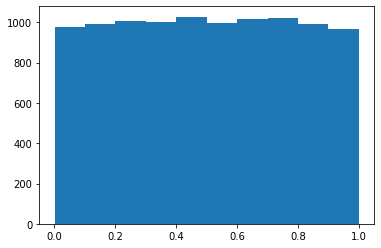

In [63]:
plt.hist(prior);

In [64]:
def generative_model(n_visits, probability):
    return np.random.binomial(n_visits, probability)

In [65]:
generative_model(100, 0.14)

17

In [66]:
simulation = []
for p in prior:
    simulation.append(generative_model(100,p))

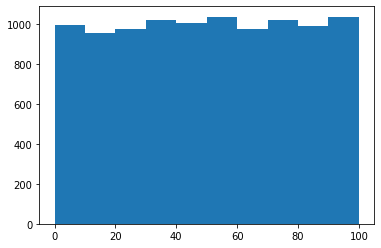

In [67]:
plt.hist(simulation);

Produce a set of descriptive statistics for the posterior distribution.

In [68]:
truth = 14
posteriori = []
for n_vis in simulation:
    posteriori.append(n_vis==truth)

In [69]:
post=[prob for prob,res in zip(prior,posteriori) if res]

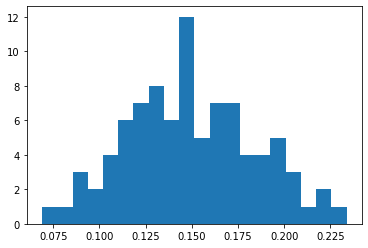

In [76]:
plt.hist(post, bins = 20);

What is the 90% credible interval range?

In [78]:
df = pd.DataFrame(post)
df.describe()

,0
count,89.000000
mean,0.149933
std,0.035107
min,0.068989
25%,0.123494
50%,0.147543
75%,0.170752
max,0.233697


In [84]:
mean = df.describe().loc["mean",0]
mean

0.14993322839622472

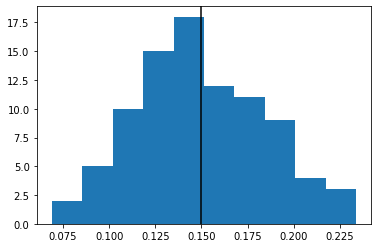

In [88]:
plt.hist(post)
plt.axvline(mean, color = 'black');

What is the Maximum Likelihood Estimate?